In [3]:
#importing dependencies

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
# Load the datasets
myntra_df = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Myntra.csv") 

ajio_df = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Ajio.csv")   

In [8]:
# Display the first few rows of both datasets
print("Myntra Dataset:")
print(myntra_df.head())
print("\nAjio Dataset:")
print(ajio_df.head())

Myntra Dataset:
                 Brand                        Name     Price        Discount
0  StyleCast x Revolte  Windcheater Leather Jacket  Rs. 1399  (Rs. 2600 OFF)
1  StyleCast x Revolte  Windcheater Leather Jacket  Rs. 1549  (Rs. 2450 OFF)
2  StyleCast x Revolte      Outdoor Leather Jacket  Rs. 1649  (Rs. 3300 OFF)
3             Roadster    Men Solid Leather Jacket  Rs. 2089       (45% OFF)
4             Roadster    Men Solid Leather Jacket  Rs. 2089       (45% OFF)

Ajio Dataset:
      Brand                                 Name   Price   Discount
0  RED TAPE                     Men Solid Jacket  ₹2,310  (70% off)
1  RED TAPE                     Men Solid Jacket  ₹2,310  (70% off)
2  RED TAPE                     Men Solid Jacket  ₹2,310  (70% off)
3    Vooter     Men Zip-Front Regular Fit Jacket    ₹750  (70% off)
4    Vooter  Zip-Front Jacket with Insert Pocket    ₹750  (70% off)


In [9]:
# Combine datasets
myntra_df['Source'] = 'Myntra'
ajio_df['Source'] = 'Ajio'
combined_df = pd.concat([myntra_df, ajio_df], ignore_index=True)

In [26]:
import pandas as pd
import numpy as np

# Assuming `combined_df` is the loaded DataFrame

# Step 1: Clean up the 'Price' column to be numeric
combined_df['Price'] = combined_df['Price'].replace({'₹': '', 'Rs.': '', ',': ''}, regex=True).astype(float)

# Step 2: Extract percentage-based discounts
combined_df['Discount_Percentage'] = combined_df['Discount'].str.extract(r'(\d+)%')[0].astype(float)

# Step 3: Extract rupee-based discounts
combined_df['Rupee_Discount'] = combined_df['Discount'].str.extract(r'Rs\.\s*(\d+)')[0].astype(float)

# Step 4: Calculate percentage for rupee-based discounts where applicable
# For rows where 'Discount_Percentage' is NaN, calculate based on 'Rupee_Discount'
combined_df['Calculated_Discount_Percentage'] = np.where(
    combined_df['Discount_Percentage'].isna() & combined_df['Rupee_Discount'].notna(),
    (combined_df['Rupee_Discount'] / (combined_df['Price'] + combined_df['Rupee_Discount'])) * 100,
    combined_df['Discount_Percentage']
)

# Step 5: Finalize 'Discount_Percentage' by filling missing values with calculated percentages
combined_df['Discount_Percentage'] = combined_df['Calculated_Discount_Percentage']

# Drop unnecessary columns if no longer needed
combined_df = combined_df.drop(columns=['Rupee_Discount', 'Calculated_Discount_Percentage'])

# Display result to verify
print(combined_df[['Brand', 'Name', 'Price', 'Discount', 'Discount_Percentage']].head())


                 Brand                        Name   Price Discount  \
0  StyleCast x Revolte  Windcheater Leather Jacket  1399.0      nan   
1  StyleCast x Revolte  Windcheater Leather Jacket  1549.0      nan   
2  StyleCast x Revolte      Outdoor Leather Jacket  1649.0      nan   
3             Roadster    Men Solid Leather Jacket  2089.0     45.0   
4             Roadster    Men Solid Leather Jacket  2089.0     45.0   

   Discount_Percentage  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


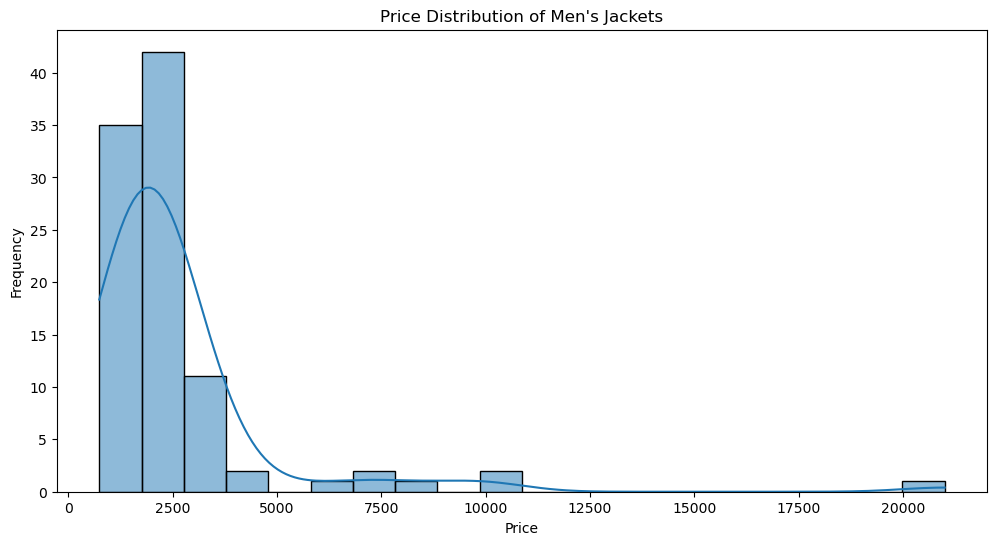

In [27]:
# Price Distribution Analysis
plt.figure(figsize=(12, 6))
sns.histplot(combined_df['Price'], bins=20, kde=True)
plt.title('Price Distribution of Men\'s Jackets')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [32]:
import pandas as pd

# Ensure discount_percentage is numeric, coercing errors to NaN
combined_df['Discount'] = pd.to_numeric(combined_df['Discount'], errors='coerce')

# Calculate the average discount by brand, dropping NaNs
avg_discount = combined_df.groupby('Brand')['Discount'].mean().reset_index()

# Display the results
print("\nAverage Discount Percentage by Brand:")
print(avg_discount)



Average Discount Percentage by Brand:
                   Brand   Discount
0         CRIMSOUNE CLUB  40.000000
1           Campus Sutra  57.000000
2           Fort Collins  45.076923
3                    GAP  30.000000
4             HIGHLANDER  52.666667
5               Hardsoda  65.000000
6     JOHN PLAYERS JEANS  51.000000
7         LEATHER RETAIL  50.000000
8         Leather Retail        NaN
9                 MANIAC  71.000000
10                 Mufti  62.000000
11                  NIKE  31.000000
12             PERFORMAX  10.000000
13                  Puma  69.000000
14              RED TAPE  70.000000
15              RICHLOOK  56.000000
16              Roadster  51.800000
17         Royal Enfield  23.000000
18   StyleCast x Revolte        NaN
19                  TBOJ  58.000000
20     Teakwood Leathers  60.000000
21  The Indian Garage Co  61.000000
22       U.S. Polo Assn.  45.000000
23                Vooter  70.000000
24                 WROGN  35.000000
25              Woodland 

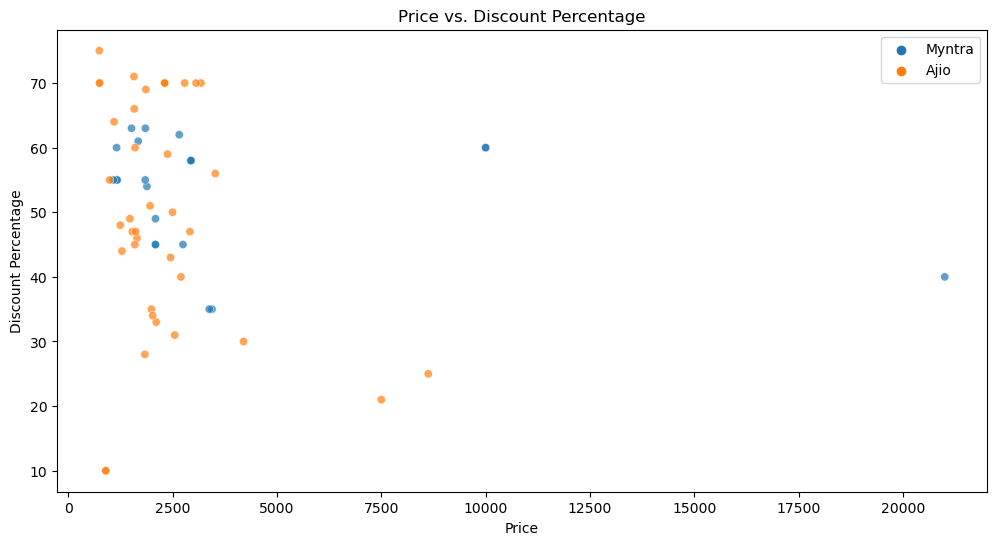

In [34]:
# Price vs. Discount Correlation
plt.figure(figsize=(12, 6))
sns.scatterplot(data=combined_df, x='Price', y='Discount', hue='Source', alpha=0.7)
plt.title('Price vs. Discount Percentage')
plt.xlabel('Price')
plt.ylabel('Discount Percentage')
plt.legend()
plt.show()

In [37]:
# Brand Comparison - Average Price and Discount
avg_price_discount = combined_df.groupby('Brand').agg({'Price': 'mean', 'Discount': 'mean'}).reset_index()

# Sort by average price in ascending order
avg_price_discount_sorted_asc = avg_price_discount.sort_values(by='Price', ascending=True)
print("\nAverage Price and Discount Percentage by Brand (Sorted Ascending by Price):")
print(avg_price_discount_sorted_asc)



Average Price and Discount Percentage by Brand (Sorted Ascending by Price):
                   Brand         Price   Discount
23                Vooter    750.000000  70.000000
26                YOUSTA    865.666667        NaN
12             PERFORMAX    961.500000  10.000000
1           Campus Sutra   1235.200000  57.000000
5               Hardsoda   1339.500000  65.000000
2           Fort Collins   1546.000000  45.076923
9                 MANIAC   1574.000000  71.000000
13                  Puma   1860.000000  69.000000
18   StyleCast x Revolte   1917.181818        NaN
4             HIGHLANDER   1939.666667  52.666667
21  The Indian Garage Co   1947.000000  61.000000
6     JOHN PLAYERS JEANS   1960.000000  51.000000
16              Roadster   2090.400000  51.800000
8         Leather Retail   2499.000000        NaN
7         LEATHER RETAIL   2499.000000  50.000000
11                  NIKE   2550.000000  31.000000
10                 Mufti   2659.000000  62.000000
14              RED TAP

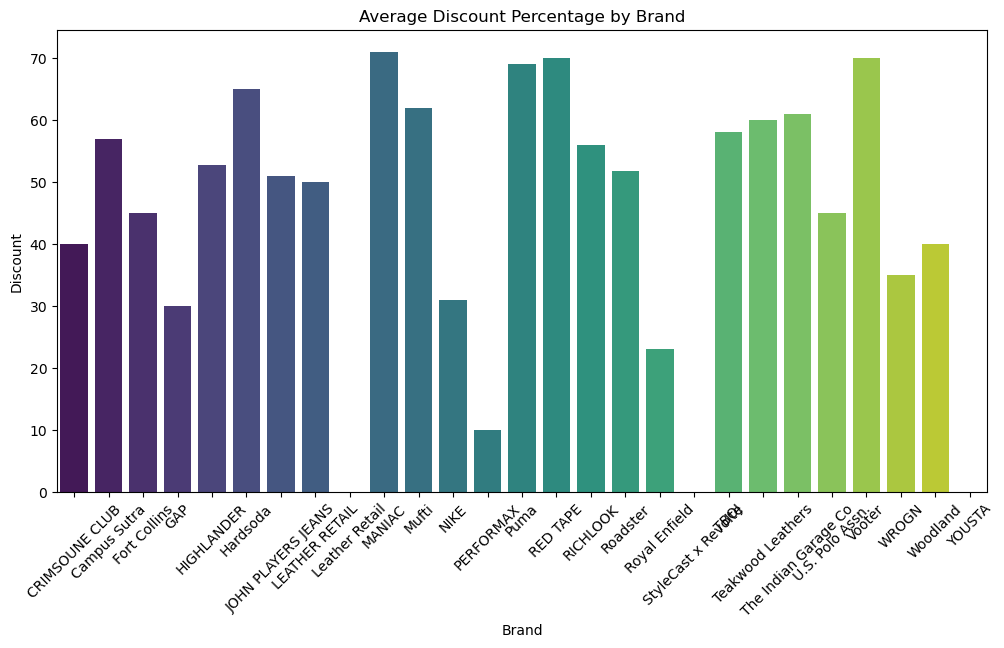

In [39]:
# Bar plot for average discount percentage by brand
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_discount, x='Brand', y='Discount', palette='viridis')
plt.title('Average Discount Percentage by Brand')
plt.xticks(rotation=45)
plt.show()

In [43]:
# Top Discounted Items
top_discounted = combined_df.nlargest(10, 'Discount')
print("\nTop 10 Discounted Items:")
print(top_discounted[['Brand', 'Name', 'Price', 'Discount']])


Top 10 Discounted Items:
           Brand                                         Name   Price  \
90  Fort Collins  Zip-Front Bomber Jacket with Insert Pockets   744.0   
67        MANIAC             Men Checked Oversized Fit Jacket  1574.0   
50      RED TAPE                             Men Solid Jacket  2310.0   
51      RED TAPE                             Men Solid Jacket  2310.0   
52      RED TAPE                             Men Solid Jacket  2310.0   
53        Vooter             Men Zip-Front Regular Fit Jacket   750.0   
54        Vooter          Zip-Front Jacket with Insert Pocket   750.0   
71      RED TAPE                Men Regular Fit Puffer Jacket  3180.0   
72      RED TAPE             Men Regular Fit Zip-Front Jacket  3060.0   
89      RED TAPE               Puffer Jacket with Zip-Closure  2790.0   

    Discount  
90      75.0  
67      71.0  
50      70.0  
51      70.0  
52      70.0  
53      70.0  
54      70.0  
71      70.0  
72      70.0  
89      70.0  
